<a href="https://colab.research.google.com/github/MarianaVilasBoas/Portfolio/blob/main/Analisando_os_Dados_do_Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Nova York*
## Obtenção dos Dados
Todos os dados usados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta análise vou estudar os dados referente à cidade de Nova York e extrair insights a partir de testes das hipóteses levantadas, para isso foi baixado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*

In [179]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-04-07/visualisations/listings.csv")

## Análise dos Dados

Primeiro analisei as cinco primeiras entradas do _dataset_ para visualizar melhor as variáveis

In [181]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355


### **Análise das Variáveis**

Verifiquei, então, o volume dos dados e os tipos das variáveis

In [182]:
# identificar o volume de dados do DataFrame
print("Entradas:\t",df.shape[0])
print("Variáveis\t",df.shape[1])

# verificar as 5 primeiras entradas do dataset
print("\n\n Tipos Variáveis\n",df.dtypes)

Entradas:	 36905
Variáveis	 16


 Tipos Variáveis
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


A partir dessas informações montei um dicionário a fim de facilitar a análise do _dataset_.

######**Dicionário das variáveis**

* **id** - número de indentificação do imóvel
* **name** - nome do anúncio do imóvel
* **host_name** - nome do proprietário do imóvel
* **neighbourhood_group** - nome do distrito
* **neighbourhood** - nome do bairro
* **latitude** - coordenada da latitude do imóvel
* **longitude** - coordenada da longitude do imóvel
* **room_type** - tipo de quarto que é oferecido
* **price** - preço da diária do imóvel
* **minimum_nights** - número mínimos de noites para aluguel
* **number_of_reviews** - número de reviews que o imóvel possui
* **last_reviews** - data do último review
* **reviews_per_month** - número de reviews por mês
* **calculated_host_listing_counts** - quantidade de imóveis anunciados do mesmo proprietário
* **availability_365** - número de dias no ano que o imóvel fica disponível para locação

### **Valores Ausentes**

Verifiquei o percentual dos valores nulos para entender se eram significativos em relação ao total de entradas.

In [183]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.263379
last_review                       0.263379
host_name                         0.034358
name                              0.000352
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível ver que as colunas `review_per_month` e `last_review` possuem 26% dos seus valores nulos. 
* A variável `host_name` têm aproximadamente 3% dos valores nulos, enquanto a variável `name` possui cerca de 0,03%.

### **Distribuição das Variáveis** 
Para analisar a distribuição das variáveis e verificar se há sinais de outliers plotei os seguintes histogramas

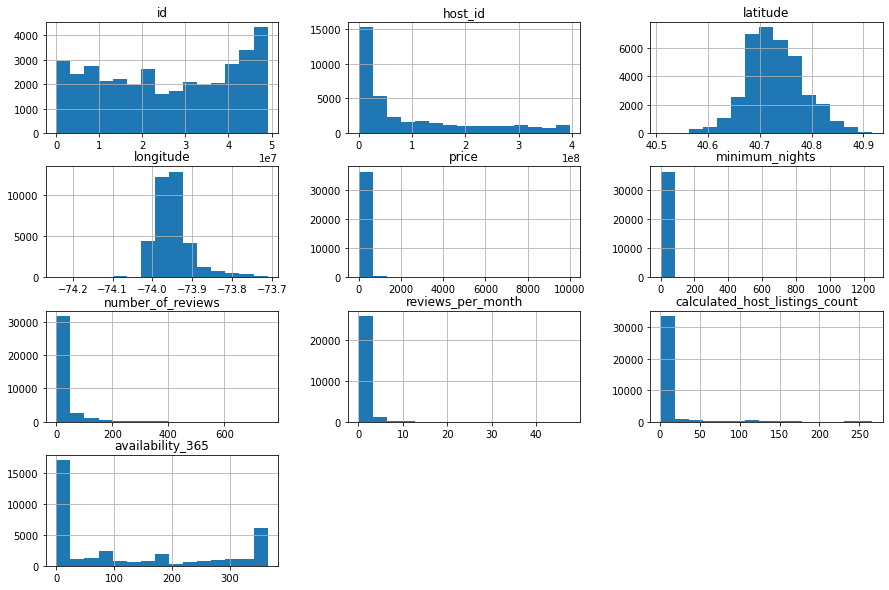

In [184]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

Com base nos histogramas foi possível verificar indícios da presença de *outliers* nas variáveis `price`, `minimum_nights` e `reviews_per_month` que serão fundamentais na análise, os valores não seguem uma distruição e distorcem a representação gráfica.

### **Outliers**
Para confirmar a presença de outliers, analisei a distribuição estatística das variáveis:

In [185]:
#distribuição estatística das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36905.000000,36905.000000,36905.000000,27185.000000,36905.000000,36905.000000
mean,148.559274,23.123235,22.668636,0.854783,11.071318,123.697087
std,290.379973,26.546473,48.003378,1.349439,36.699390,143.178789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.100000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.340000,1.000000,54.000000
75%,160.000000,30.000000,20.000000,1.090000,3.000000,269.000000
max,10000.000000,1250.000000,755.000000,47.600000,266.000000,365.000000


Com base no resumo estatístico percebi que:

* A variável `price` possui 75% do valor abaixo de 160, porém o seu valor máximo nessa base de dados é 10000, indicando uma grande dispersão dos dados.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias, o que não poderia ocorrer visto que o máximo de dias que o imóvel pode ficar disponível no ano são 365 dias.
* A variável `reviews_per_month` possui 75% do valor abaixo de 1.09, mas o valor máximo de ocorrência na base de dados é de 47.60.
* A variável `number_of_reviews` possui 75% do valor abaixo de 20, entretanto o valor máximo registrado é de 755.

Para confirmar a presença de outliers plotei o Diagrama de Caixas das variáveis em questão a fim de analisar a variação dos dados de forma mais visual:

#### Boxplot para price




price: valores acima de 300
2402 entradas
6.5086%


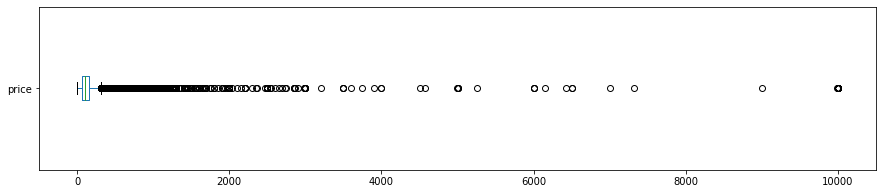

In [186]:
#bloxplot para preço
df.price.plot(kind="box",vert=False,figsize=(15,3))

# ver quantidade de valores acima de 300 para price
print("\nprice: valores acima de 300")
print("{} entradas".format(len(df[df.price > 300])))
print("{:.4f}%".format((len(df[df.price > 300]) / df.shape[0])*100))

#### Boxplot para minimum_nights


minimum_nights: valores acima de 50
711 entradas
1.9266%


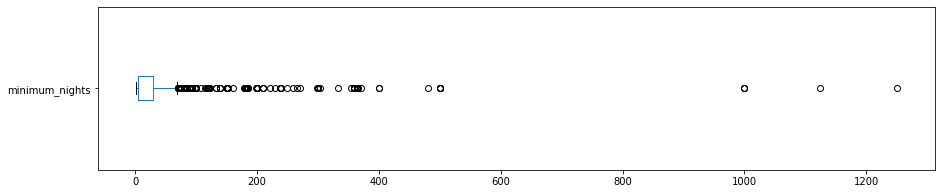

In [187]:
#boxplot para minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))

#ver a quantidade de valores acima de 50 dias para minimum_nights
print("\nminimum_nights: valores acima de 50")
print("{} entradas".format(len(df[df.minimum_nights > 50])))
print("{:.4f}%".format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))

#### Boxplot para reviews_per_month


reviews_per_month: valores acima de 3
1582 entradas
4.2867%


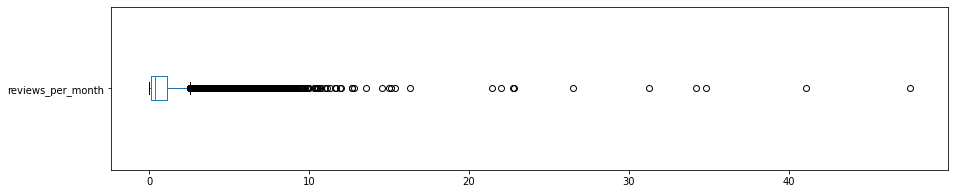

In [188]:
#boxplot para reviews_per_month
df.reviews_per_month.plot(kind='box',vert=False,figsize=(15,3))

#ver a quantidade de valores acima de 3 para reviews_per_month
print("\nreviews_per_month: valores acima de 3")
print("{} entradas".format(len(df[df.reviews_per_month > 3])))
print("{:.4f}%".format((len(df[df.reviews_per_month > 3]) / df.shape[0])*100))

#### Boxplot para number_of_reviews


number_of_reviews: valores acima de 70
3611 entradas
9.7846%


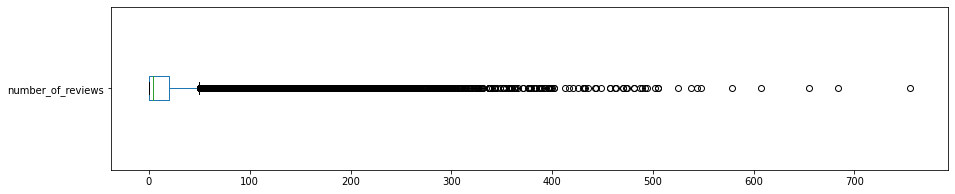

In [189]:
#boxplot para number_of_reviews
df.number_of_reviews.plot(kind='box',vert=False,figsize=(15,3))

#ver a quantidade de valores acima de 70 para number_of_reviews
print("\nnumber_of_reviews: valores acima de 70")
print("{} entradas".format(len(df[df.number_of_reviews > 70])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 70]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Após a confirmação da presença de outliers limpei o *DataFrame* das variáveis indicadas acima e plotei os histogramas para analisar as 'novas' distribuições

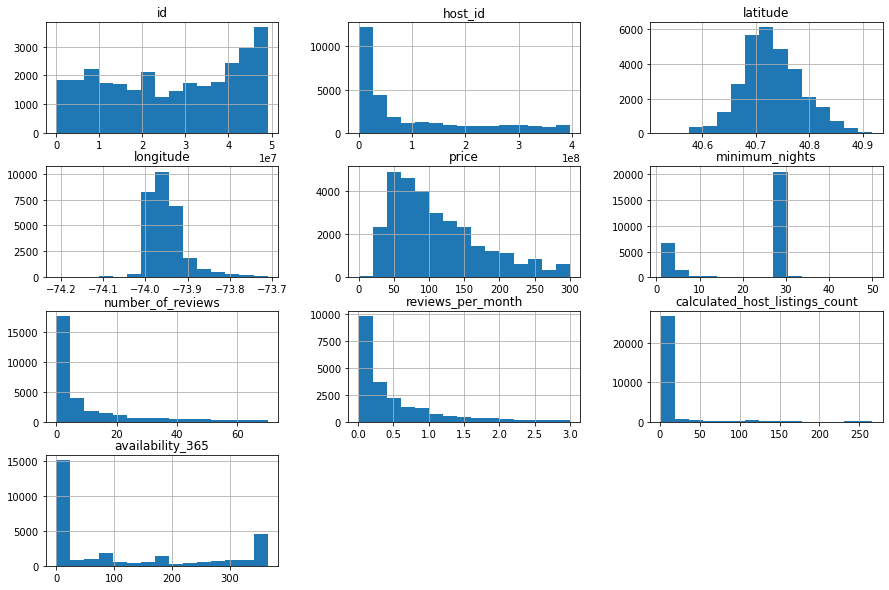

In [190]:
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price>300].index,axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>50].index,axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month>3].index,axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews>70].index,axis=0,inplace=True)

df_clean.hist(bins=15,figsize=(15,10));


Agora, com a base de dados 'limpa', comecei a realizar a análise efetivamente olhando para o preço e a correlação das variáveis

### **Média dos preços de aluguel**

In [191]:
# ver a média da coluna `price`
df_clean.price.mean()

110.17351307954773

### **Correlação existente entre as variáveis**

Para analisar a correlação entra as variáveis plotei uma Matriz de Correlação

In [192]:
# criar uma matriz de correlação
corr=df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.010229,0.018373,-0.006308,-0.014182,0.014996
minimum_nights,-0.010229,1.000000,-0.218984,-0.446678,0.127982,-0.105909
number_of_reviews,0.018373,-0.218984,1.000000,0.621137,-0.140348,0.069396
reviews_per_month,-0.006308,-0.446678,0.621137,1.000000,-0.039712,0.194982
calculated_host_listings_count,-0.014182,0.127982,-0.140348,-0.039712,1.000000,0.246337
availability_365,0.014996,-0.105909,0.069396,0.194982,0.246337,1.000000


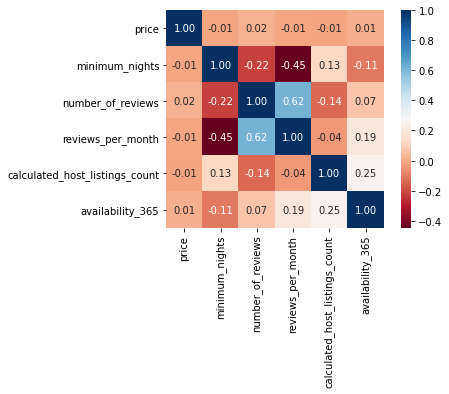

In [193]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu',fmt='.2f',square=True,annot=True,linecolor='white')

A única correlação forte (acima de |0.5|) entre as variáveis foi a `number_of_reviews` com a `reviews_per_month`. Não considerei uma correlação válida de ser explorada, pois a relação é nítida: quanto maior o número de avaliações por mês do imóvel maior o número de avaliações no todo do local.

### **Tipo de imóvel mais alugado no Airbnb**


In [194]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14751
Private room       14393
Shared room          582
Hotel room           168
Name: room_type, dtype: int64

In [195]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.493444
Private room       0.481468
Shared room        0.019469
Hotel room         0.005620
Name: room_type, dtype: float64

### **Localidade mais cara do dataset**



In [196]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10]

neighbourhood
Eltingville        214.500000
Lighthouse Hill    210.000000
Neponsit           200.000000
Tribeca            189.632075
Woodlawn           185.000000
Arden Heights      173.666667
NoHo               172.777778
Unionport          171.500000
West Village       168.754098
DUMBO              167.600000
Name: price, dtype: float64

Acima, vemos que bairros como Lighthouse Hill e Neponsit estão com média de preço superior a de lugares como Tribeca, NoHo e West Village, tradicionalmente famosos.
Verifiquei que essas amostras de dados não são representativas, veja que só há 1 entrada há para Lighthouse Hill e Neponsit e, por isso, podem ser desconsideradas.

In [43]:
# ver quantidade de imóveis em Lighthouse Hill
df_clean[df_clean.neighbourhood == "Lighthouse Hill"].shape

(1, 16)

In [44]:
#ver a quantidade de imóveis em Neponsit
df_clean[df_clean.neighbourhood=='Neponsit'].shape

(1, 16)

### **Localidade mais barata do dataset**

In [197]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=True)[:10]

neighbourhood
South Beach           35.000000
Huguenot              36.000000
Castle Hill           38.000000
Soundview             42.800000
Graniteville          45.000000
Grant City            46.300000
Woodside              51.170667
University Heights    51.300000
Port Richmond         52.000000
Hunts Point           52.739130
Name: price, dtype: float64

In [198]:
#ver a quantidade de imóveis em Graniteville
df_clean[df_clean.neighbourhood=='Graniteville'].shape

(1, 16)

In [47]:
#ver a quantidade de imóveis em University Heights
df_clean[df_clean.neighbourhood=='University Heights'].shape

(10, 16)

Com base nas latitudes e longitudes dos imóveis, plotei um gráfico onde cada imóvel anunciado representa um ponto e suas cores variam de acordo com o preço da diária do aluguel, conforme a régua a direita do gráfico. Isto é, quanto mais cara a diária do imóvel mais avermelhado é o ponto e quanto mais barata mais azulado.

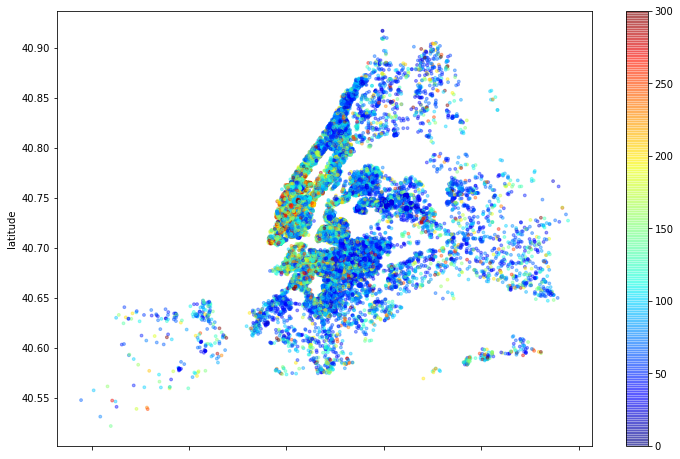

In [199]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,c=df_clean['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8))

Comparando o gráfico acima com o mapa de Nova York por distrito percebi que as localidades com diárias mais elevadas são Manhattan (parte central do gráfico) e Brooklyn (parte inferior esquerda), regiões que mais apresentam pontos avermelhados.
É importante ressaltar que algumas localidades possuem poucos anúncios o que pode acabar distorcendo as informações estatísticas de alguns atributos.

### **Média do mínimo de noites para aluguel (minimum_nights)**

In [200]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

22.272897571419016

## Hipótese
A partir dos resultados gerados da análise dos dados, levantei a seguinte hipótese sobre o **Airbnb em Nova York**:

* A **média** de **noites mínimas** de locação dos imóveis é bem **elevada** cerca de **22 dias**, indicando que os proprietários procuram majoritariamente o Airbnb para encontrar **inquilos**, pessoas que vão residir um tempo em Nova York e não somente turistas.

Com base na distribuição da variável minimum_nights resolvi analisar os imóveis em dois grupos:
* estadia mínima superior a 25 dias
* estadia mínima inferior a 15 dias

In [201]:
#analisar quantidade de imóveis com mininum_nights superior a 25 dias
print("A quantidade de imóveis com diária mínima superior a 25 dias são:",df_clean[df_clean.minimum_nights>25].shape[0])

#analisar quantidade de imóveis com mininum_nights inferior a 15 dias
print("A quantidade de imóveis com diária mínima inferior a 15 dias são:",df_clean[df_clean.minimum_nights<15].shape[0])

A quantidade de imóveis com diária mínima superior a 25 dias são: 21036
A quantidade de imóveis com diária mínima inferior a 15 dias são: 8610


In [202]:
#analisar percentual dos tipos dos imóveis com minimum_nighst superior a 25 dias
print("Percentual de imóveis com estadia mínima superior a 25 dias:")
df_clean[df_clean.minimum_nights>25].room_type.value_counts()/df_clean.shape[0]

Percentual de imóveis com estadia mínima superior a 25 dias:


Entire home/apt    0.352613
Private room       0.336757
Shared room        0.012745
Hotel room         0.001572
Name: room_type, dtype: float64

In [203]:
#analisar pecentual dos tipos dos imóveis com minimum_nights inferior a 15 dias
print("Percentual de imóveis com estadia mínima inferior a 15 dias:")
df_clean[df_clean.minimum_nights<15].room_type.value_counts()/df_clean.shape[0]

Percentual de imóveis com estadia mínima inferior a 15 dias:


Private room       0.141065
Entire home/apt    0.136215
Shared room        0.006690
Hotel room         0.004048
Name: room_type, dtype: float64

####Conclusões Hipótese 1
* Como podemos ver, a quantidade de **imóveis** com **estadia mínima** superior a **25 dias** é mais que o **dobro** dos anunciados com locação **inferior** a **15 dias**, indicando que os proprietários de imóveis do Airbnb em Nova York utilizam a plataforma com **foco** em **estadias mais longas**. Isso, portanto, **comprova** a **hipótese** que o **público alvo** dos **anúncios** do Airbnb em Nova York **não são** os **turistas** que, por sua vez, usualmente viajam em **média 9 dias** conforme informado em [pesquisa](https://qz.com/954413/new-york-city-needs-foreign-tourists-because-they-spend-more/) realizada em 2017 pela **NYC & Company** organização oficial de marketing, turismo e parceria da cidade de Nova York.
*O **curioso** é que os **percentuais** de **tipos de imóveis** anunciados (Entire Home/Apt e Private Room)  se mantém **muito próximos independendo** da **estadia mínima exigida**, podendo haver um **índicio** que muitos proprietários alugam quartos como uma **renda extra mensal** ou até mesmo que seja algo **cultural**.